In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
fold1_X_train = pd.read_csv('data/processed/fold_1_X_train.csv')
fold1_X_test = pd.read_csv('data/processed/fold_1_X_test.csv')  
fold1_y_train = pd.read_csv('data/processed/fold_1_y_train.csv')
fold1_y_test = pd.read_csv('data/processed/fold_1_y_test.csv')
fold2_X_train = pd.read_csv('data/processed/fold_2_X_train.csv')
fold2_X_test = pd.read_csv('data/processed/fold_2_X_test.csv')  
fold2_y_train = pd.read_csv('data/processed/fold_2_y_train.csv')
fold2_y_test = pd.read_csv('data/processed/fold_2_y_test.csv')

print("Ready for Feature Classification:")
print(f"  Training features: {fold1_X_train.shape}")
print(f"  Features to classify: {len(fold1_X_train.columns)}")
print(f"  Data integrity verified: ✅")

Ready for Feature Classification:
  Training features: (8495, 18)
  Features to classify: 18
  Data integrity verified: ✅


In [66]:
fold1_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num__temp_C         8495 non-null   float64
 1   num__dewpoint_C     8495 non-null   float64
 2   num__slp_hPa        8495 non-null   float64
 3   num__wind_dir_deg   8495 non-null   float64
 4   num__precip_mm      8495 non-null   float64
 5   cat__sky_cover_0    8495 non-null   float64
 6   cat__sky_cover_0 -  8495 non-null   float64
 7   cat__sky_cover_1    8495 non-null   float64
 8   cat__sky_cover_1 -  8495 non-null   float64
 9   cat__sky_cover_5    8495 non-null   float64
 10  cat__sky_cover_5 -  8495 non-null   float64
 11  cat__sky_cover_6    8495 non-null   float64
 12  cat__sky_cover_6 -  8495 non-null   float64
 13  cat__sky_cover_7 -  8495 non-null   float64
 14  dt__dt__hour        8495 non-null   float64
 15  dt__dt__dow         8495 non-null   float64
 16  dt__dt

In [67]:
fold1_X_train.describe()

,num__temp_C,num__dewpoint_C,num__slp_hPa,num__wind_dir_deg,num__precip_mm,cat__sky_cover_0,cat__sky_cover_0 -,cat__sky_cover_1,cat__sky_cover_1 -,cat__sky_cover_5,cat__sky_cover_5 -,cat__sky_cover_6,cat__sky_cover_6 -,cat__sky_cover_7 -,dt__dt__hour,dt__dt__dow,dt__dt__month,dt__dt__is_weekend
count,8.495000e+03,8.495000e+03,8.495000e+03,8.495000e+03,8.495000e+03,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8.495000e+03,8.495000e+03,8.495000e+03,8.495000e+03
mean,8.029677e-17,4.182123e-17,2.970980e-15,-7.360537e-17,-1.200269e-16,0.780224,0.172808,0.007416,0.005297,0.018599,0.006710,0.005180,0.003649,0.000118,-6.963235e-17,-8.029677e-17,-1.070624e-16,-6.942325e-17
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.414119,0.378103,0.085802,0.072593,0.135113,0.081643,0.071786,0.060302,0.010850,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-3.002637e+00,-3.394120e+00,-2.868419e+00,-1.846816e+00,-2.820836e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.613084e+00,-1.502400e+00,-1.942616e+00,-6.379050e-01
25%,-8.337260e-01,-7.368357e-01,-6.852662e-01,-9.813172e-01,-5.532014e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.011579e-01,-1.002874e+00,-7.208179e-01,-6.379050e-01
50%,-9.539888e-03,-2.088343e-02,-1.261662e-01,3.650139e-01,3.538525e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.684714e-02,-3.822154e-03,1.955309e-01,-6.379050e-01
75%,7.604234e-01,8.327520e-01,7.257959e-01,8.458464e-01,8.073794e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.498488e-01,9.952301e-01,8.064301e-01,1.567631e+00
max,2.571464e+00,2.347266e+00,3.028756e+00,1.519012e+00,1.260906e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.661774e+00,1.494756e+00,1.417329e+00,1.567631e+00


In [68]:
def plot_numeric_distribution(df, column, label=None, bins=30):
    """
    Plot histogram + boxplot for a numeric feature.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing the feature.
    column : str
        Column name to plot.
    label : str, optional
        Pretty label for titles/axes (defaults to column name).
    bins : int
        Number of bins for histogram.
    """
    if label is None:
        label = column

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(f"Distribution of {label}")
    plt.xlabel(label)
    plt.ylabel("Count")
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {label}")
    plt.xlabel(label)
    plt.show()

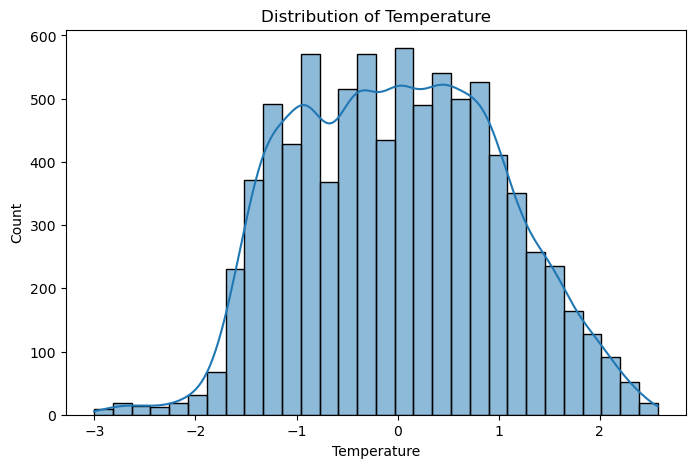

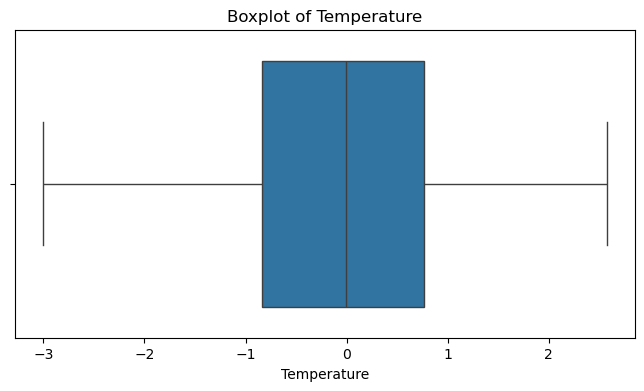

In [69]:
plot_numeric_distribution(fold1_X_train, "num__temp_C", label="Temperature")

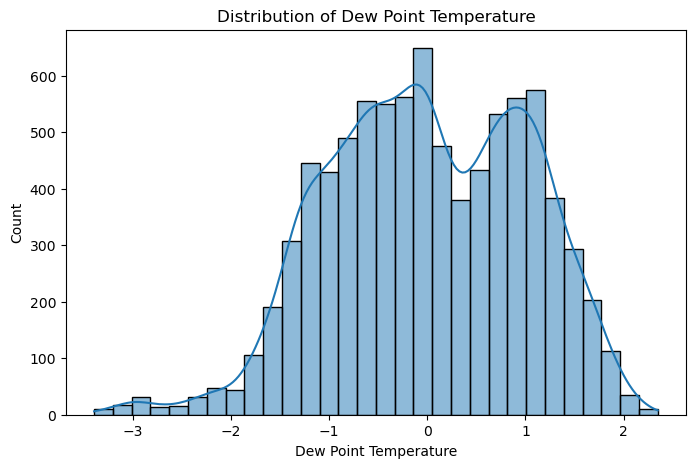

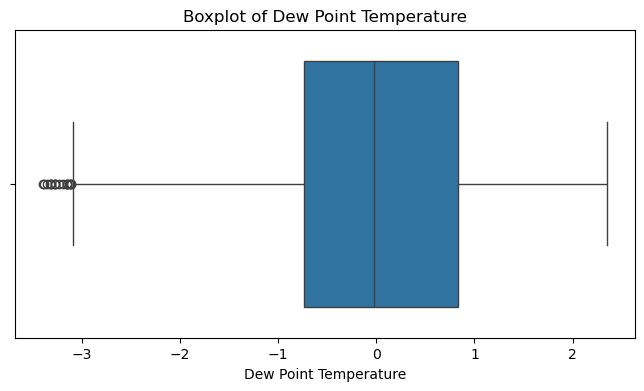

In [70]:
plot_numeric_distribution(fold1_X_train, "num__dewpoint_C", label="Dew Point Temperature")

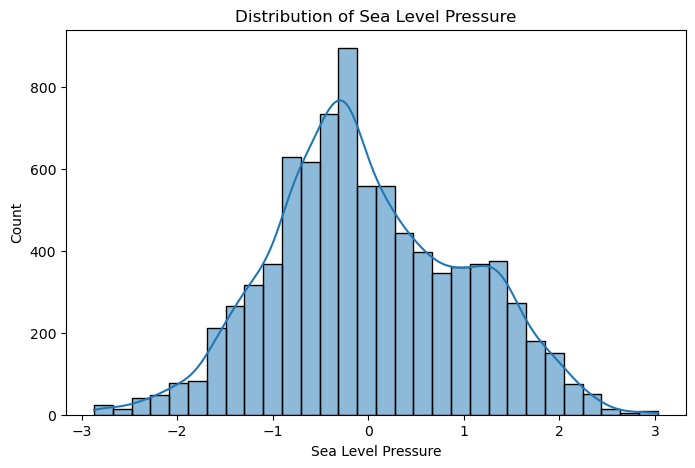

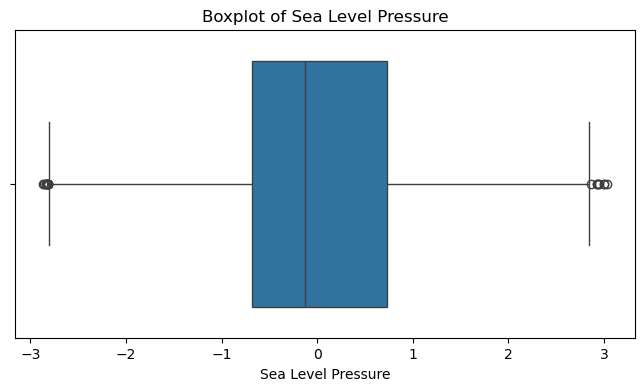

In [71]:
plot_numeric_distribution(fold1_X_train, "num__slp_hPa", label="Sea Level Pressure")

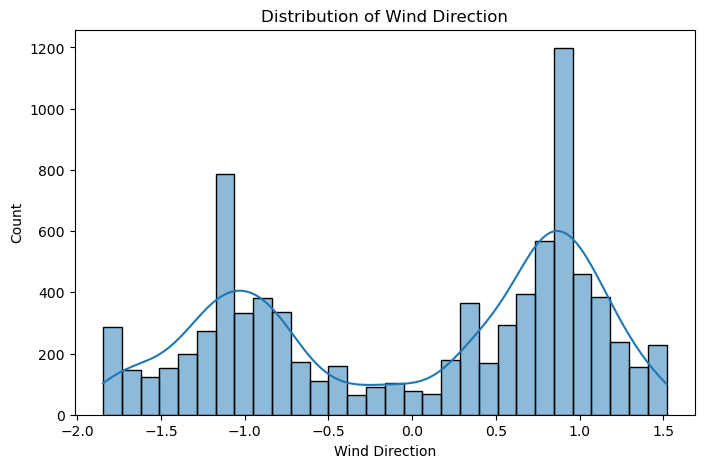

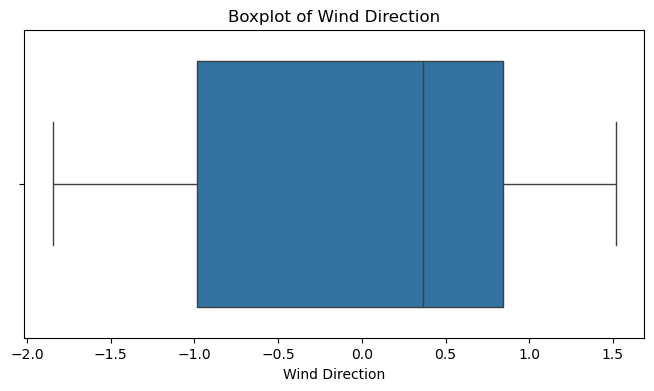

In [72]:
plot_numeric_distribution(fold1_X_train, "num__wind_dir_deg", label="Wind Direction")

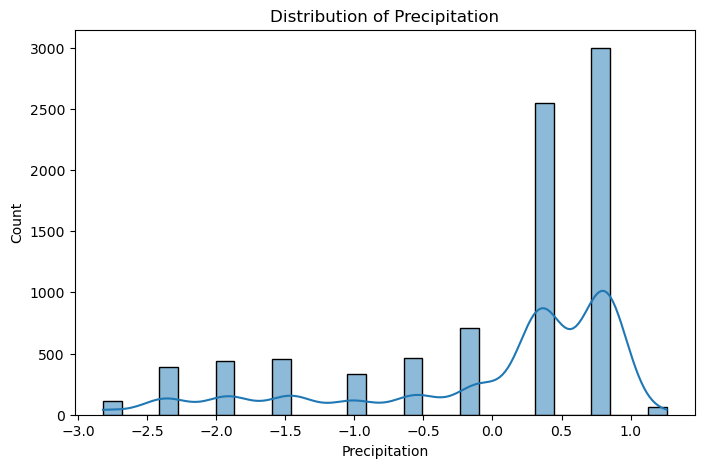

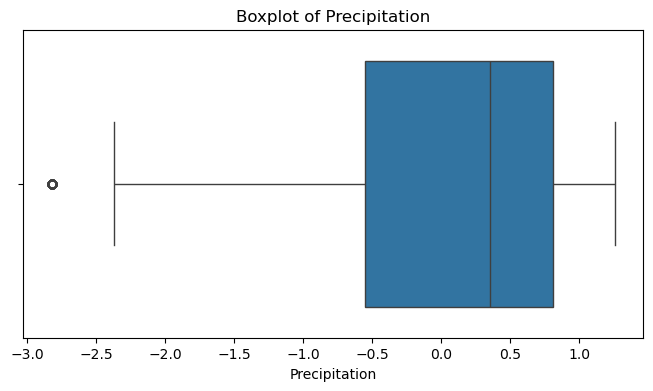

In [73]:
plot_numeric_distribution(fold1_X_train, "num__precip_mm", label="Precipitation")

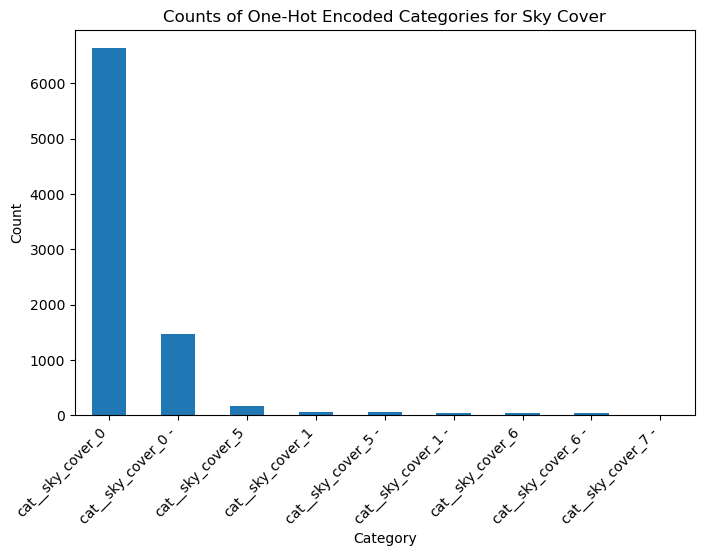

In [74]:
ohe_cols = [col for col in fold1_X_train.columns if col.startswith("cat__sky_cover_")]

# Sum across rows to get counts per category
counts = fold1_X_train[ohe_cols].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,5))
counts.plot(kind="bar")
plt.title("Counts of One-Hot Encoded Categories for Sky Cover")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

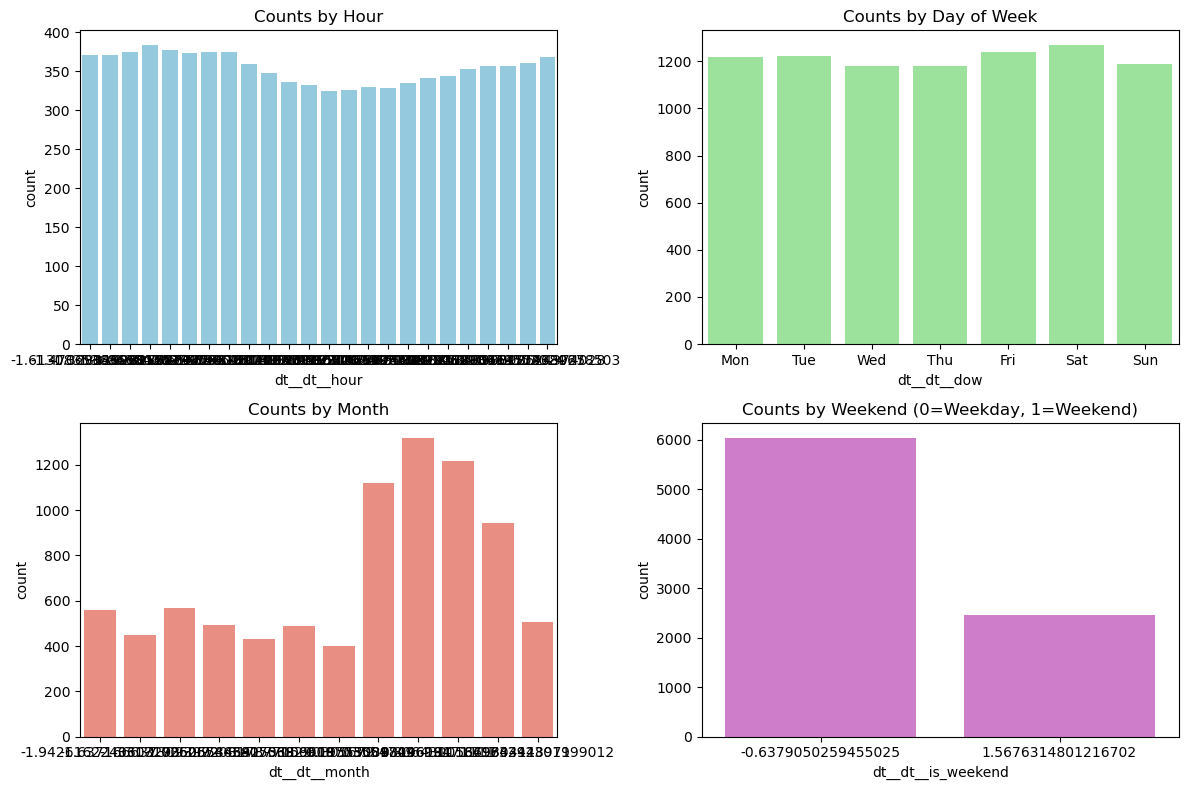

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x="dt__dt__hour", data=fold1_X_train, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Counts by Hour")
sns.countplot(x="dt__dt__dow", data=fold1_X_train, ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("Counts by Day of Week")
axes[0,1].set_xticks(range(7))
axes[0,1].set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
sns.countplot(x="dt__dt__month", data=fold1_X_train, ax=axes[1,0], color="salmon")
axes[1,0].set_title("Counts by Month")
sns.countplot(x="dt__dt__is_weekend", data=fold1_X_train, ax=axes[1,1], color="orchid")
axes[1,1].set_title("Counts by Weekend (0=Weekday, 1=Weekend)")
plt.tight_layout()
plt.show()

In [76]:
def detect_outliers_iqr(df, column, factor=1.5, return_filtered=True):
    """
    Detect outliers in a numeric column using the IQR method.

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing the column.
    column : str
        Column name to check for outliers.
    factor : float, default=1.5
        Multiplier for IQR (1.5 = Tukey's rule, 3 = more conservative).
    return_filtered : bool, default=True
        Whether to also return the dataframe without outliers.

    Returns
    -------
    outlier_info : dict
        Dictionary with bounds, number of outliers, percentage.
    df_filtered : pd.DataFrame (if return_filtered=True)
        The dataframe with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    mask_outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    n_outliers = mask_outliers.sum()
    perc_outliers = n_outliers / len(df) * 100

    outlier_info = {
        "column": column,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "n_outliers": int(n_outliers),
        "perc_outliers": round(perc_outliers, 2),
        "n_total": len(df),
    }

    if return_filtered:
        df_filtered = df.loc[~mask_outliers].copy()
        return outlier_info, df_filtered
    else:
        return outlier_info

In [77]:
info, df_no_outliers = detect_outliers_iqr(fold1_X_train, "num__temp_C")
print(info)

info, df_no_outliers = detect_outliers_iqr(fold1_X_train, "num__dewpoint_C")
print(info)

info, df_no_outliers = detect_outliers_iqr(fold1_X_train, "num__slp_hPa")
print(info)

info, df_no_outliers = detect_outliers_iqr(fold1_X_train, "num__precip_mm")
print(info)

{'column': 'num__temp_C', 'lower_bound': np.float64(-3.2249500758305154), 'upper_bound': np.float64(3.151647530683185), 'n_outliers': 0, 'perc_outliers': np.float64(0.0), 'n_total': 8495}
{'column': 'num__dewpoint_C', 'lower_bound': np.float64(-3.0912173066263513), 'upper_bound': np.float64(3.1871335849750633), 'n_outliers': 18, 'perc_outliers': np.float64(0.21), 'n_total': 8495}
{'column': 'num__slp_hPa', 'lower_bound': np.float64(-2.801859385527906), 'upper_bound': np.float64(2.8423890090795365), 'n_outliers': 19, 'perc_outliers': np.float64(0.22), 'n_total': 8495}
{'column': 'num__precip_mm', 'lower_bound': np.float64(-2.5940727412457134), 'upper_bound': np.float64(2.8482507081124404), 'n_outliers': 112, 'perc_outliers': np.float64(1.32), 'n_total': 8495}


In [78]:
summary = pd.DataFrame({
    'Feature Name': fold1_X_train.columns,
    'Type': fold1_X_train.dtypes,
    'Missing?': fold1_X_train.isnull().mean().round(2),
    'Unique Values': fold1_X_train.nunique()
})
summary

,Feature Name,Type,Missing?,Unique Values
num__temp_C,num__temp_C,float64,0.0,470
num__dewpoint_C,num__dewpoint_C,float64,0.0,385
num__slp_hPa,num__slp_hPa,float64,0.0,407
num__wind_dir_deg,num__wind_dir_deg,float64,0.0,36
num__precip_mm,num__precip_mm,float64,0.0,10
cat__sky_cover_0,cat__sky_cover_0,float64,0.0,2
cat__sky_cover_0 -,cat__sky_cover_0 -,float64,0.0,2
cat__sky_cover_1,cat__sky_cover_1,float64,0.0,2
cat__sky_cover_1 -,cat__sky_cover_1 -,float64,0.0,2
cat__sky_cover_5,cat__sky_cover_5,float64,0.0,2


| Feature Name          | Description                                                                 | Type     | Missing? | Unique Values | Notes (Scaling/Encoding)              |
|-----------------------|-----------------------------------------------------------------------------|----------|----------|---------------|---------------------------------------|
| num__temp_C           | Air temperature in °C (scaled)                                              | float64  | 0.0      | 470           | Continuous, standardized (mean=0, std=1) |
| num__dewpoint_C       | Dew point temperature in °C (scaled)                                        | float64  | 0.0      | 385           | Continuous, standardized              |
| num__slp_hPa          | Sea-level pressure in hPa (scaled)                                          | float64  | 0.0      | 407           | Continuous, standardized              |
| num__wind_dir_deg     | Wind direction in degrees (scaled)                                          | float64  | 0.0      | 36            | Continuous/circular, standardized     |
| num__precip_mm        | Precipitation in mm (scaled)                                                | float64  | 0.0      | 10            | Continuous, standardized              |
| cat__sky_cover_0      | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_0 -    | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_1      | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_1 -    | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_5      | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_5 -    | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_6      | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_6 -    | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| cat__sky_cover_7 -    | One-hot encoded sky cover category                                          | float64  | 0.0      | 2             | Binary indicator (encoded)            |
| dt__dt__hour          | Hour of day extracted from datetime (scaled)                                | float64  | 0.0      | 24            | Cyclical numeric, standardized        |
| dt__dt__dow           | Day of week (0=Mon … 6=Sun) extracted from datetime (scaled)                | float64  | 0.0      | 7             | Cyclical numeric, standardized        |
| dt__dt__month         | Month (1–12) extracted from datetime (scaled)                               | float64  | 0.0      | 12            | Cyclical numeric, standardized        |
| dt__dt__is_weekend    | Weekend indicator (0=weekday, 1=weekend) extracted from datetime (encoded)  | float64  | 0.0      | 2             | Binary categorical, encoded (no scaling) |